##Equalização adaptativa

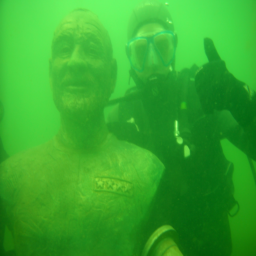

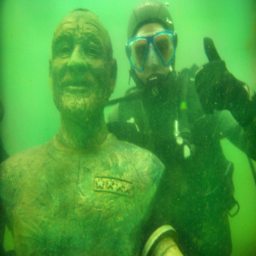

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

imagem = cv2.imread('1.png')
B, G, R = cv2.split(imagem)

B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(B)
G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(G)
R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(R)

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(imagem)
cv2_imshow(nova_imagem)

##Transformação linear

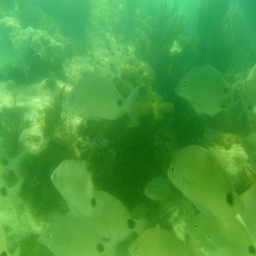

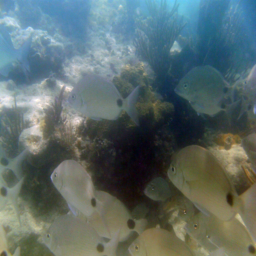

In [ ]:
imagem = cv2.imread('2.png')
cv2_imshow(imagem)

B, G, R = cv2.split(imagem)

def max_min(img):
  max = 0
  for i in img:
    for j in i:
      if j > max:
        max = j
  min = max
  for i in img:
    for j in i:
      if j < min:
        min = j
  return max, min

Bmax, Bmin = max_min(B)
Gmax, Gmin = max_min(G)
Rmax, Rmin = max_min(R)

gmax = 255
gmin = 0

for i in range(len(B)):
  for j in range(len(B[i])):
    g = (gmax - gmin)/(Bmax - Bmin)*(B[i][j] - Bmin) + gmin
    B[i][j] = g

for i in range(len(G)):
  for j in range(len(G[i])):
    g = (gmax - gmin)/(Gmax - Gmin)*(G[i][j] - Gmin) + gmin
    G[i][j] = g

for i in range(len(R)):
  for j in range(len(R[i])):
    g = (gmax - gmin)/(Rmax - Rmin)*(R[i][j] - Rmin) + gmin
    R[i][j] = g

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(nova_imagem)

##Correção de cor

In [ ]:
def correcao_cor(imagem):
    B, G, R = cv2.split(imagem)
    BMax = np.max(B)
    BMin = np.min(B)
    BMedia = np.mean(B)
    GMax = np.max(G)
    GMin = np.min(G)
    GMedia = np.mean(G)
    RMax = np.max(R)
    RMin = np.min(R)
    RMedia = np.mean(R)
    if (BMedia <= 128):
      for i in range(len(B)):
        for j in range(len(B[i])):
          B[i][j] = (B[i][j] - BMedia)*((BMin - 128)/(BMin - BMedia)) + 128
    else:
      for i in range(len(B)):
        for j in range(len(B[i])):
          B[i][j] = (B[i][j] - BMedia)*((BMax - 128)/(BMax - BMedia)) + 128
    if (GMedia <= 128):
      for i in range(len(G)):
        for j in range(len(G[i])):
          G[i][j] = (G[i][j] - GMedia)*((GMin - 128)/(GMin - GMedia)) + 128
    else:
      for i in range(len(G)):
        for j in range(len(G[i])):
          G[i][j] = (G[i][j] - GMedia)*((GMax - 128)/(GMax - GMedia)) + 128
    if (RMedia <= 128):
      for i in range(len(R)):
        for j in range(len(R[i])):
          R[i][j] = (R[i][j] - RMedia)*((RMin - 128)/(RMin - RMedia)) + 128
    else:
      for i in range(len(R)):
        for j in range(len(R[i])):
          R[i][j] = (R[i][j] - RMedia)*((RMax - 128)/(RMax - RMedia)) + 128
    return cv2.merge([B, G, R])

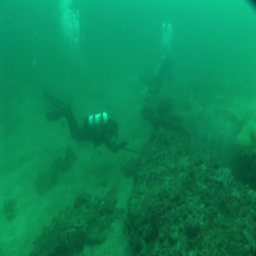

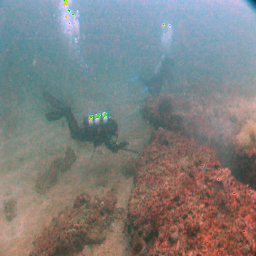

In [ ]:
imagem = cv2.imread('4.png')
imagem_corrigida = correcao_cor(imagem)

cv2_imshow(imagem)
cv2_imshow(imagem_corrigida)

##Máscara de nitidez

In [ ]:
nitidez_kernel = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]

In [ ]:
from math import ceil
def aplica_filtro(imagem, kernel):
  n = len(kernel)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]])
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      matriz_img = []
      for x in range(i, i + n):
        linha = []
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          linha.append(imagem[x][y])
        matriz_img.append(linha)
      if len(matriz_img) > 0:
        for k in range(len(kernel)):
          for l in range(len(kernel[k])):
            soma = soma + kernel[k][l]*matriz_img[k][l]
        x_y = ceil(n/2) - 2
        nova_imagem[x - x_y][y - x_y] = soma
  return nova_imagem

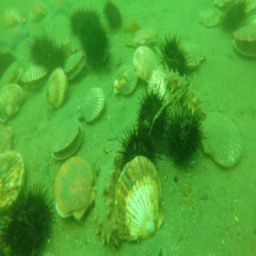

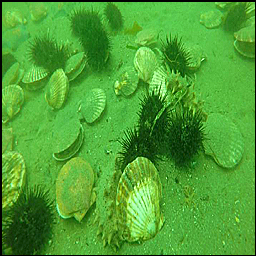

In [ ]:
imagem = cv2.imread('5.png')
B, G, R = cv2.split(imagem)

B = aplica_filtro(B, nitidez_kernel)
G = aplica_filtro(G, nitidez_kernel)
R = aplica_filtro(R, nitidez_kernel)

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(imagem)
cv2_imshow(nova_imagem)

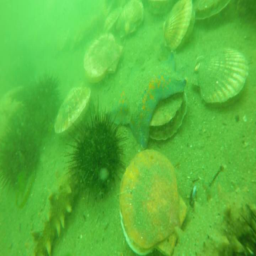

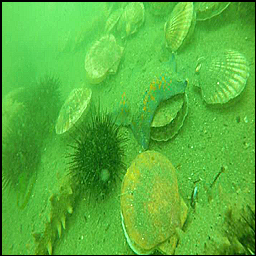

In [ ]:
imagem = cv2.imread('6.png')
B, G, R = cv2.split(imagem)

B = aplica_filtro(B, nitidez_kernel)
G = aplica_filtro(G, nitidez_kernel)
R = aplica_filtro(R, nitidez_kernel)

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(imagem)
cv2_imshow(nova_imagem)

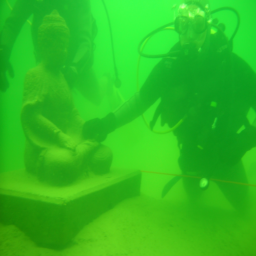

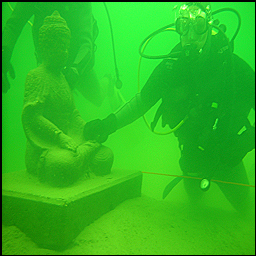

In [ ]:
imagem = cv2.imread('8.png')
B, G, R = cv2.split(imagem)

kernel = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]

B = aplica_filtro(B, kernel)
G = aplica_filtro(G, kernel)
R = aplica_filtro(R, kernel)

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(imagem)
cv2_imshow(nova_imagem)

###Acidionando correção de cor

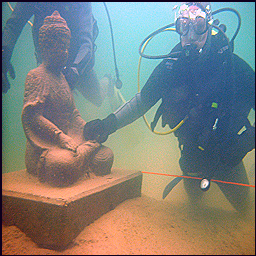

In [ ]:
nova_imagem = correcao_cor(nova_imagem)

cv2_imshow(nova_imagem)

##Equalização padrão

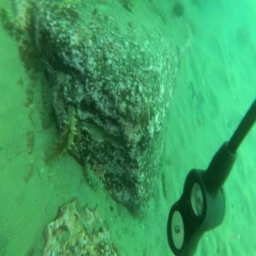

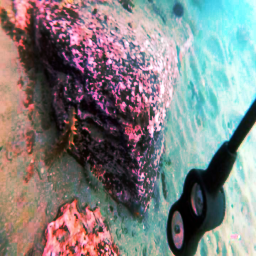

In [ ]:
imagem = cv2.imread('9.png')

B, G, R = cv2.split(imagem)

B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(imagem)
cv2_imshow(nova_imagem)

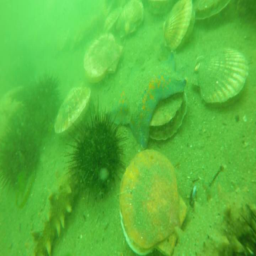

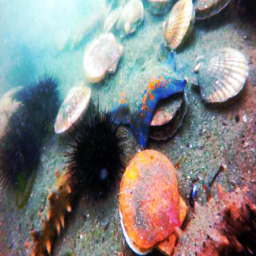

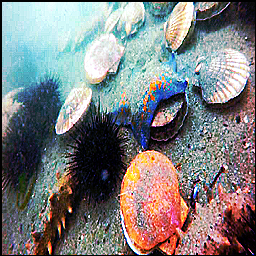

In [ ]:
imagem = cv2.imread('6.png')
B, G, R = cv2.split(imagem)

B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(imagem)
cv2_imshow(nova_imagem)



#Aplicando a máscara de nitidez:

B, G, R = cv2.split(nova_imagem)

B = aplica_filtro(B, nitidez_kernel)
G = aplica_filtro(G, nitidez_kernel)
R = aplica_filtro(R, nitidez_kernel)

nova_imagem = cv2.merge([B, G, R])

cv2_imshow(nova_imagem)

##Ajuste do brilho/contraste

In [ ]:
def brilho_contraste(imagem, alfa, beta):
  nova_imagem = np.ones(imagem.shape, imagem.dtype)
  for i in range(len(imagem)):
      for j in range(len(imagem[i])):
          for k in range(imagem.shape[2]):
              nova_imagem[i,j,k] = np.clip(alfa*imagem[i,j,k] + beta, 0, 255)
  return nova_imagem

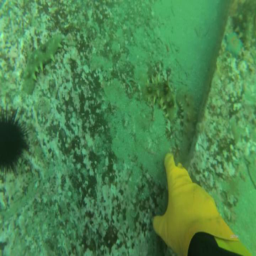

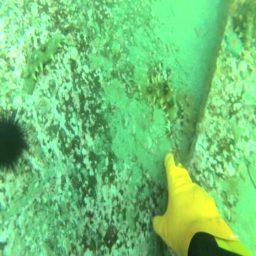

In [ ]:
imagem = cv2.imread('10.png')

nova_imagem = brilho_contraste(imagem, 1.5, 1)

cv2_imshow(imagem)
cv2_imshow(nova_imagem)

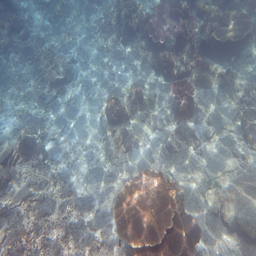

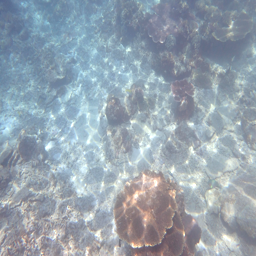

In [ ]:
imagem = cv2.imread('34.png')

nova_imagem = brilho_contraste(imagem, 1.2, 1)


cv2_imshow(imagem)
cv2_imshow(nova_imagem)